# Project objective
This project is designed to review the UMAP method and its python implementation using MFCC dataset.

Information about the dataset, some technical details about the used machine learning method(s) and mathematical details of the quantifications approaches are provided in the code.

# Packages we work with in this notebook
We are going to use the following libraries and packages:

* **numpy**: NumPy is the fundamental package for scientific computing with Python. (http://www.numpy.org/)
* **pandas**: Pandas provides easy-to-use data structures and data analysis tools for Python. (https://pandas.pydata.org/)
* **sklearn**: Scikit-learn is a machine learning library for Python programming language. (https://scikit-learn.org/stable/)
* **matplotlib**: Matplotlib is a visualization library in Python. (https://matplotlib.org/)
* **umap**: https://umap-learn.readthedocs.io/en/latest/

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import umap

# Introduction to the dataset

**Name**: Anuran Calls (MFCCs) dataset

**Summary**: Acoustic features extracted from syllables of anuran (frogs) calls, including the family, the genus, and the species labels (multilabel).

**number of features**: 22 (real) 

**Number of data points (instances)**: 7195

**Link to the dataset**: http://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29





## Importing the dataset
We can import the dataset in multiple ways

**Colab Notebook**: You can download the dataset file (or files) from the link (if provided) and uploading it to your google drive and then you can import the file (or files) as follows:

**Note.** When you run the following cell, it tries to connect the colab with google derive. Follow steps 1 to 5 in this link (https://www.marktechpost.com/2019/06/07/how-to-connect-google-colab-with-google-drive/) to complete the process. 

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

# This path is common for everybody
# This is the path to your google drive
input_path = '/content/gdrive/My Drive/'
file_name = 'Frogs_MFCCs.csv'
# sometimes we need to specify "sep" based on column spacing in the original file
target_dataset = pd.read_csv(input_path+file_name)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Local directory**: In case you save the data in your local directory, you need to change "input_path" to the local directory you saved the file (or files) in.

##Data preparation

We need to prepare the dataset for machine learnign modeling. Here we need to convert categorical columns (strings) to integeres. Those columns can be used as output variable.

In [0]:
# converting strings in categorical features to integers
cat_columns = target_dataset.select_dtypes(['object']).columns
target_dataset[cat_columns] = target_dataset[cat_columns].apply(lambda x: pd.factorize(x)[0])

### Separating features from output variable
The dataframe of the target dataset has a column we would like to predict its values (output variable). We need to separate this column from the rest of the dataframe which include the features we want to use to build the model.

In [0]:
output_var = target_dataset['Species']
input_features = target_dataset[[col for col in target_dataset.columns if 'MFCC' in col]]
print('number of features: {}'.format(input_features.shape[0]))

number of features: 7195


# Uniform Manifold Approximation and Projection (UMAP)

UMAP is an algorithm to optimally map the higher dimensional space to lower dimensions paying attention to both short and long distances. As oppose to t-SNE, we can talk abotu large distance in the results of UMAP.

UMAP is a manifold learning method that is comptetitive to t-SNE for visualization quality while preserving the global structure of data, unlike t-SNE. UMAP has no computational restriction and is scalable to extremely large dataset, like GoogleNews, unlike t-SNE.

UMAP uses k-nearest neighbor and uses Stochastic Gradient Descent to minimize the difference between the distances in the high dimensional and low dimensional spaces.


**Definitions you may need for reading UMAP paper**

* A n-dimensional manifold (n-manifold) M is a topological space that is locally homeomorphic to the Euclidean space of dimension n.
* Locally homeomorphic means that every point in the space M is contained in an open set U such that there is a one-to-one onto map f:U -> M.
* One-to-one onto map f:U -> M means that each element of M is mapped by exactly one element of U.
* A topological space is a collection of open sets (with some mathematical properties).
* A Riemannian (smooth) manifold M is a real smooth manifold with an inner product that varies smoothly from point to point in the tangent space of M.
* Riemannian metric is collection of all the inner products of the points in the manifold M on the tangent space of M.

* A simplicial complex K in n-dimensional real space is a collection of simplices in the space such that 1) Every face of a simplex of K is in K, and 2) The intersection of any two simplices of K is a face of each of them (Munkres 1993, p. 7; http://mathworld.wolfram.com/).
* A simplex is the generalization of a tetrahedral region of space to n dimensions(http://mathworld.wolfram.com/).

## Implementing UMAP on the dataset
We first need to initialize the model by specifying its hyperparameters and then fit using the feature values in input_features. 

**Parameters of UMAP:**

*  ***Number of neighbors (n_neighbors)***: Number of neighboring data points used in the process of local manifold approximation. This parameters is suggested to be between 5 and 50.
*  ***Minimum distance (min_dist)***: It is a measure of allowed compression of points together in low dimensional space. This parameters is suggested to be between 0.001 and 0.5.



In [0]:
# Initializing the model
model_init =umap.UMAP(n_neighbors=10, min_dist=0.3, n_components=2, random_state=2)

# Fitting the model using the inpur array
embedding_umap = model_init.fit_transform(input_features)

## Writing a plotting function for visualizing the results of UMAP
UMAP is an unsupervised dimensionality reduction approach. However as we have the labes of the images, we can visualize the images in the 2-dimensional space, generated by UMAP, to check how the images are grouped together.

In [0]:
def embedding_plot(X,labels,title):
  # scatter plot of data points 
  plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Spectral', s=5)
  plt.gca().set_facecolor((1, 1, 1))
  # specifyign labels of x and y axis
  plt.xlabel('1st dimension', fontsize=24)
  plt.ylabel('2nd dimension', fontsize=24)
  # showing the colorbar in the figure
  plt.colorbar(boundaries=np.arange((len(np.unique(labels))))-0.5).set_ticks(np.arange(10))
  # removing the grid
  plt.grid(False)
  # specifying the plot title
  plt.title(title, fontsize=24);

Now we can use the plotting function to show the results of UMAP on the image dataset.

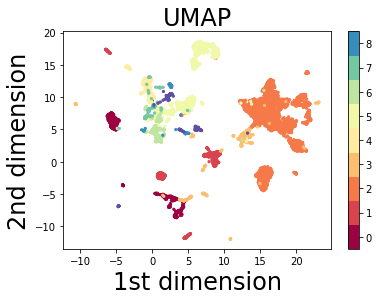

In [0]:
embedding_plot(embedding_umap, output_var,"UMAP")